In [1]:
#Working with APIs


import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-1-f8751ad5c73f>:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
#Creating our dictionary

dict_ = {'A': [1,2,3,4,5], 'B': [5,6,7,8,9]}

In [4]:
dict_

{'A': [1, 2, 3, 4, 5], 'B': [5, 6, 7, 8, 9]}

In [5]:
type(dict_)

dict

In [7]:
df = pd.DataFrame(dict_)

In [8]:
df

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
4,5,9


In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head()

,A,B
0,1,5
1,2,6
2,3,7
3,4,8
4,5,9


In [11]:
df.mean()

A    3.0
B    7.0
dtype: float64

In [42]:
%pip install nba_api

In [32]:
from nba_api.stats.static import teams
import matplotlib.pyplot as plt

In [47]:
def one_dict(list_dict):
    keys = list_dict[0].keys()
    out_dict = {key:[] for key in keys}
    for dict_ in list_dict:
        for key, value in dict_.items():
            out_dict[key].append(value)

    return out_dict

In [34]:
# There is a get_teams() function from the nba_api API, which returns a set of dictionaries
#teams is a module, what is a module when calling apis??

nba_teams = teams.get_teams()

In [35]:
nba_teams[0:3]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970}]

In [36]:
type(teams)

module

In [37]:
type(nba_teams)

list

In [ ]:
dict_nba_team=one_dict(nba_teams)
df_teams=pd.DataFrame(dict_nba_team)
df_teams.head()

In [48]:
#type casting, converting the list to a pandas dataframe

dict_nba_team = one_dict(nba_teams)
df = pd.DataFrame(dict_nba_team)
df.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [45]:
pd.__version__

'2.2.0'

In [56]:
#using team nicknames to find the id and details of warriors

df_warriors= df[df['nickname'] == 'Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [58]:
#Selecting on the ID for the warriors

id_warriors = df_warriors[['id']].values[0][0]

In [59]:
id_warriors

1610612744

In [61]:
''' 
Note that there are different modules within the nba_api API, we called a module previously,
stats.static, under which teams is also a sub-module,
now we are about to call a new module called stats.endpoint and use a leaguegamefinder (module or function??)
'''

from nba_api.stats.endpoints import leaguegamefinder

In [64]:
#Assigning an API response to a parameter called gamefinder
#Note that the LeagueGamefinder is a function different from the leaguegamefinder module
#Here we also assign the ID of the warriors to a parameter called team_id_nullable and 
# and we tell the api to find and return all games involving the warriors and save the response to gamefinder

In [66]:
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)

<class 'requests.exceptions.ConnectionError'>: HTTPSConnectionPool(host='stats.nba.com', port=443): Max retries exceeded with url: /stats/leaguegamefinder?Conference=&DateFrom=&DateTo=&Division=&DraftNumber=&DraftRound=&DraftTeamID=&DraftYear=&EqAST=&EqBLK=&EqDD=&EqDREB=&EqFG3A=&EqFG3M=&EqFG3_PCT=&EqFGA=&EqFGM=&EqFG_PCT=&EqFTA=&EqFTM=&EqFT_PCT=&EqMINUTES=&EqOREB=&EqPF=&EqPTS=&EqREB=&EqSTL=&EqTD=&EqTOV=&GameID=&GtAST=&GtBLK=&GtDD=&GtDREB=&GtFG3A=&GtFG3M=&GtFG3_PCT=&GtFGA=&GtFGM=&GtFG_PCT=&GtFTA=&GtFTM=&GtFT_PCT=&GtMINUTES=&GtOREB=&GtPF=&GtPTS=&GtREB=&GtSTL=&GtTD=&GtTOV=&LeagueID=&Location=&LtAST=&LtBLK=&LtDD=&LtDREB=&LtFG3A=&LtFG3M=&LtFG3_PCT=&LtFGA=&LtFGM=&LtFG_PCT=&LtFTA=&LtFTM=&LtFT_PCT=&LtMINUTES=&LtOREB=&LtPF=&LtPTS=&LtREB=&LtSTL=&LtTD=&LtTOV=&Outcome=&PORound=&PlayerID=&PlayerOrTeam=T&RookieYear=&Season=&SeasonSegment=&SeasonType=&StarterBench=&TeamID=1610612744&VsConference=&VsDivision=&VsTeamID=&YearsExperience= (Caused by TimeoutError("Failed to execute 'send' on 'XMLHttpRequest': Failed to load 'https://stats.nba.com/stats/leaguegamefinder?Conference=&DateFrom=&DateTo=&Division=&DraftNumber=&DraftRound=&DraftTeamID=&DraftYear=&EqAST=&EqBLK=&EqDD=&EqDREB=&EqFG3A=&EqFG3M=&EqFG3_PCT=&EqFGA=&EqFGM=&EqFG_PCT=&EqFTA=&EqFTM=&EqFT_PCT=&EqMINUTES=&EqOREB=&EqPF=&EqPTS=&EqREB=&EqSTL=&EqTD=&EqTOV=&GameID=&GtAST=&GtBLK=&GtDD=&GtDREB=&GtFG3A=&GtFG3M=&GtFG3_PCT=&GtFGA=&GtFGM=&GtFG_PCT=&GtFTA=&GtFTM=&GtFT_PCT=&GtMINUTES=&GtOREB=&GtPF=&GtPTS=&GtREB=&GtSTL=&GtTD=&GtTOV=&LeagueID=&Location=&LtAST=&LtBLK=&LtDD=&LtDREB=&LtFG3A=&LtFG3M=&LtFG3_PCT=&LtFGA=&LtFGM=&LtFG_PCT=&LtFTA=&LtFTM=&LtFT_PCT=&LtMINUTES=&LtOREB=&LtPF=&LtPTS=&LtREB=&LtSTL=&LtTD=&LtTOV=&Outcome=&PORound=&PlayerID=&PlayerOrTeam=T&RookieYear=&Season=&SeasonSegment=&SeasonType=&StarterBench=&TeamID=1610612744&VsConference=&VsDivision=&VsTeamID=&YearsExperience='."))

In [67]:
#the file returns a json file

In [68]:
gamefinder.get_json()

<class 'NameError'>: name 'gamefinder' is not defined

In [69]:
games = gamefinder.get_data_frames()[0]
games.head()

<class 'NameError'>: name 'gamefinder' is not defined

In [72]:
import requests

filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl"

def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

download(filename, "Golden_State.pkl")

In [73]:
file_name = 'Golden_State.pkl'
games = pd.read_pickle(file_name)
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10.0,3,11.0,21,3.2
1,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11.0,7,20.0,20,-8.0
2,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10.0,4,13.0,22,8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8.0,3,20.0,25,10.0
4,22019,1610612744,GSW,Golden State Warriors,1521900007,2019-07-05,GSW vs. CHA,L,200,85,...,0.889,8.0,28.0,36.0,19,9.0,3,13.0,15,-8.0


In [79]:
#Finding the areas in the table where GSW played home and away against TOR (Toronto)

games_home = games[games['MATCHUP'] == 'GSW vs. TOR']
games_away = games[games['MATCHUP'] == 'GSW @ TOR']

In [76]:
#Guessing the PLUS MINUS table shows the point difference after the end of match
#Using the Plus minus table to find mean, and this shows where GSW performed better

In [81]:
games_home['PLUS_MINUS']

3       10.0
8       -4.0
10     -13.0
11     -14.0
83     -20.0
223      5.0
304     10.0
444      5.0
462      8.0
541     21.0
655      9.0
721      7.0
872     38.0
975     12.0
1102     6.0
1166    11.0
1325    11.0
1407    26.0
1482     6.0
1547    -3.0
1650     5.0
1751    -7.0
1822   -16.0
1912   -18.0
1992    -2.0
2074     4.0
Name: PLUS_MINUS, dtype: float64

In [82]:
games_home['PLUS_MINUS'].mean()

3.730769230769231

In [83]:
games_away['PLUS_MINUS']

9        1.0
12       5.0
13      -9.0
89      -3.0
184      2.0
326      6.0
343     -4.0
345     -6.0
435      3.0
516     24.0
614     -6.0
738     12.0
827     -8.0
938      7.0
964      1.0
1133    -4.0
1141     5.0
1221     6.0
1308    -5.0
1399    10.0
1477   -22.0
1522     7.0
1627     4.0
1755   -17.0
1789   -11.0
1861    -7.0
2053   -18.0
2117    10.0
Name: PLUS_MINUS, dtype: float64

In [86]:
games_away['PLUS_MINUS'].mean()

-0.6071428571428571

In [87]:
#This shows that the GSW team games won more at home (with a higher mean), than the 
#games played away (with a lower or negative mean)


In [88]:
#Using matplotlib to plot the values of home vs away games

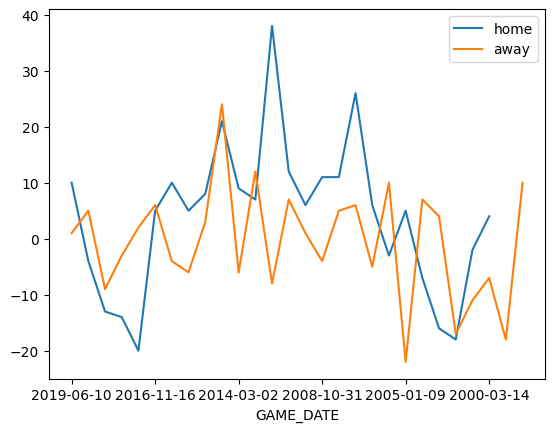

In [91]:
fig, ax = plt.subplots()

games_home.plot(x = 'GAME_DATE', y = 'PLUS_MINUS', ax = ax)
games_away.plot(x= 'GAME_DATE', y ='PLUS_MINUS', ax=ax)

ax.legend(['home', 'away'])
plt.show()
